In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import sys
import pickle
import seaborn as sns

In [7]:
df = pd.read_csv('breast-cancer.csv')

In [9]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
df.drop(['id'], axis = 1)
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]

In [17]:
y = df.diagnosis.values
x_data = df.drop(['diagnosis'], axis = 1)


In [18]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

/Users/vaps/opt/anaconda3/envs/ia/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/vaps/opt/anaconda3/envs/ia/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
	x, y, test_size = 0.2, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)


x train:  (31, 512)
x test:  (31, 57)
y train:  (512,)
y test:  (57,)


In [20]:
def initialize_weights_and_bias(dimension):
	w = np.full((dimension, 1), 0.01)
	b = 0.0
	return w, b

In [21]:

def sigmoid(z):
	y_head = 1/(1 + np.exp(-z))
	return y_head


In [22]:
def forward_backward_propagation(w, b, x_train, y_train):
	z = np.dot(w.T, x_train) + b
	y_head = sigmoid(z)
	loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
	cost = (np.sum(loss)) / x_train.shape[1]	

	derivative_weight = (np.dot(x_train, (
		(y_head - y_train).T))) / x_train.shape[1]
	derivative_bias = np.sum(
		y_head-y_train) / x_train.shape[1]				
	gradients = {"derivative_weight": derivative_weight,
				"derivative_bias": derivative_bias}
	return cost, gradients


In [23]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
	cost_list = []
	cost_list2 = []
	index = []

	for i in range(number_of_iterarion):
		cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
		cost_list.append(cost)

		w = w - learning_rate * gradients["derivative_weight"]
		b = b - learning_rate * gradients["derivative_bias"]
		if i % 10 == 0:
			cost_list2.append(cost)
			index.append(i)
			print ("Cost after iteration % i: % f" %(i, cost))

	parameters = {"weight": w, "bias": b}
	plt.plot(index, cost_list2)
	plt.xticks(index, rotation ='vertical')
	plt.xlabel("Number of Iterarion")
	plt.ylabel("Cost")
	plt.show()
	return parameters, gradients, cost_list


In [24]:
def predict(w, b, x_test):
	z = sigmoid(np.dot(w.T, x_test)+b)
	Y_prediction = np.zeros((1, x_test.shape[1]))

	for i in range(z.shape[1]):
		if z[0, i]<= 0.5:
			Y_prediction[0, i] = 0
		else:
			Y_prediction[0, i] = 1

	return Y_prediction


Cost after iteration  0:  0.692107
Cost after iteration  10:  0.498712
Cost after iteration  20:  0.405300
Cost after iteration  30:  0.350568
Cost after iteration  40:  0.314393
Cost after iteration  50:  0.288491
Cost after iteration  60:  0.268875
Cost after iteration  70:  0.253397
Cost after iteration  80:  0.240795
Cost after iteration  90:  0.230280


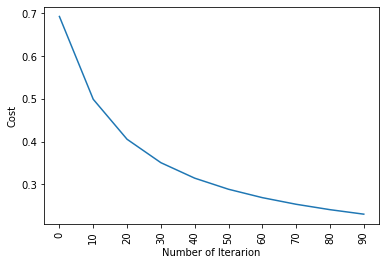

train accuracy: 94.7265625 %
test accuracy: 94.73684210526316 %


In [25]:
def logistic_regression(x_train, y_train, x_test, y_test,
						learning_rate, num_iterations):

	dimension = x_train.shape[0]
	w, b = initialize_weights_and_bias(dimension)
	
	parameters, gradients, cost_list = update(
		w, b, x_train, y_train, learning_rate, num_iterations)
	
	y_prediction_test = predict(
		parameters["weight"], parameters["bias"], x_test)
	y_prediction_train = predict(
		parameters["weight"], parameters["bias"], x_train)

	print("train accuracy: {} %".format(
		100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
	print("test accuracy: {} %".format(
		100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
	
logistic_regression(x_train, y_train, x_test,
					y_test, learning_rate = 1, num_iterations = 100)


In [26]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 150)
print("test accuracy: {} ".format(
	logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(
	logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))


test accuracy: 0.9824561403508771 
train accuracy: 0.970703125 


In [14]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


np.set_printoptions(threshold=sys.maxsize, suppress=True)

class validation_set:
	def __init__(self, X_train, y_train, X_test, y_test):
		self.X_train = X_train
		self.y_train = y_train
		self.X_test = X_test
		self.y_test = y_test

class test_set:
	def __init__(self, X_test, y_test):
		self.X_test = X_test
		self.y_test = y_test

class data_set:
	def __init__(self, validation_set, test_set):
		self.validation_set = validation_set
		self.test_set = test_set

def generate_train_test(file_name):
	pd.options.display.max_colwidth = 200

	#Lee el corpus original del archivo de entrada y lo pasa a una DataFrame
	df = pd.read_csv("breast-cancer.csv", sep=',', engine='python')
	X = df.drop(['diagnosis', 'id'],axis=1).values
	y = df['diagnosis'].values
	
	#Separa el corpus cargado en el DataFrame en el 90% para entrenamiento y el 10% para pruebas
	X_train, X_test, y_train, y_test = \
	train_test_split(X, y, test_size=0.2, shuffle = False)
	
	#~ #Crea pliegues para la validación cruzada
	validation_sets = []
	kf = KFold(n_splits=3, shuffle=True)
	for train_index, test_index in kf.split(X_train):
		print("TRAIN:", train_index, "\n",  "TEST:", test_index)
		X_train_, X_test_ = X_train[train_index], X_train[test_index]
		y_train_, y_test_ = y_train[train_index], y_train[test_index]
		#~ #Agrega el pliegue creado a la lista
		validation_sets.append(validation_set(X_train_, y_train_, X_test_, y_test_))
	
	#~ #Almacena el conjunto de prueba
	my_test_set = test_set(X_test, y_test)
	
	#~ #Guarda el dataset con los pliegues del conjunto de validación y el conjunto de pruebas
	my_data_set1 = data_set(validation_sets, my_test_set)
	
	return (my_data_set1)

my_data_set1 = generate_train_test('breast-cancer.csv')

TRAIN: [  0   1   2   4   5   6   7  10  12  14  16  20  21  23  24  25  26  27
  28  29  31  32  34  35  38  40  41  42  43  44  45  48  51  52  53  56
  57  59  60  61  62  63  65  66  68  69  70  71  75  76  78  81  82  85
  86  87  88  90  91  92  95  96  97  98 100 103 105 106 109 110 111 112
 114 116 119 120 121 122 123 124 127 128 130 131 132 134 135 137 139 140
 141 143 144 146 147 148 149 152 153 154 155 156 160 163 165 166 167 168
 169 170 171 172 173 174 175 176 178 182 185 187 188 189 190 194 196 197
 198 199 201 202 204 206 207 208 210 212 213 214 216 217 219 220 222 225
 226 229 231 233 235 236 237 239 240 241 242 243 245 246 249 250 251 252
 254 255 256 258 262 264 266 267 268 272 273 274 276 277 278 279 281 283
 284 287 288 289 290 292 293 294 296 297 298 299 302 303 305 306 307 309
 310 311 312 313 314 315 316 318 319 320 322 323 324 325 326 327 328 329
 331 333 334 336 339 340 341 342 343 344 346 348 349 350 351 352 353 354
 355 356 357 358 359 360 361 363 364 365 367

In [19]:
#clf = LogisticRegression()
clf = LogisticRegression(solver = 'liblinear')
clf.fit(my_data_set1.validation_set[0].X_train, my_data_set1.validation_set[0].y_train)

y_pred = clf.predict(my_data_set1.validation_set[0].X_test)

print(accuracy_score(my_data_set1.validation_set[0].y_test, y_pred))
print ('Clase real{}\nClase predicha{}'.format(my_data_set1.validation_set[0].y_test, y_pred))
print (my_data_set1.validation_set[0].X_test)

y_pred_proba = clf.predict_proba(my_data_set1.validation_set[0].X_test)
print (y_pred_proba)

0.9539473684210527
Clase real['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B'
 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B'
 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B']
Clase predicha['B' 'M' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B'
 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B

In [20]:
#clf = LogisticRegression()
clf = LogisticRegression(solver = 'liblinear')
clf.fit(my_data_set1.validation_set[1].X_train, my_data_set1.validation_set[1].y_train)

y_pred = clf.predict(my_data_set1.validation_set[1].X_test)

print(accuracy_score(my_data_set1.validation_set[1].y_test, y_pred))
print ('Clase real{}\nClase predicha{}'.format(my_data_set1.validation_set[1].y_test, y_pred))
print (my_data_set1.validation_set[1].X_test)

y_pred_proba = clf.predict_proba(my_data_set1.validation_set[1].X_test)
print (y_pred_proba)

0.9605263157894737
Clase real['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B']
Clase predicha['M' 'M' 'M' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'M' 'M' 'B'
 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'B

In [21]:
#clf = LogisticRegression()
clf = LogisticRegression(solver = 'liblinear')
clf.fit(my_data_set1.validation_set[2].X_train, my_data_set1.validation_set[2].y_train)

y_pred = clf.predict(my_data_set1.validation_set[2].X_test)

print(accuracy_score(my_data_set1.validation_set[2].y_test, y_pred))
print ('Clase real{}\nClase predicha{}'.format(my_data_set1.validation_set[2].y_test, y_pred))
print (my_data_set1.validation_set[1].X_test)

y_pred_proba = clf.predict_proba(my_data_set1.validation_set[2].X_test)
print (y_pred_proba)

0.9668874172185431
Clase real['M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B'
 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B'
 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B'
 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B'
 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M'
 'M' 'M' 'B' 'B' 'M' 'B' 'M']
Clase predicha['M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'M' 'B'
 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B'
 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M